# 1.Collect Initial Data

In [1]:
import glob
import os
import numpy as np
import seaborn as sb
sb.set()
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

# 1 Cotización

In [2]:
neg_all = pd.read_excel('..\\..\\Datos\\working\\negocios_all.xlsx')
print(neg_all.shape)
neg_all.head()

(2347, 49)


,ID,Fecha Cotizacion,ID Cotizacion,Medio,Tipo de Medio,Proyecto,Etapa,Productos,Jefe Comercial,Ejecutivo Comercial,...,Razon Social,Giro,Nacionalidad,N° Grupo Familiar,Actividad,Cargo,Situacion Laboral,Empleador,Antiguedad Laboral,Profesión
0,42212,2017-07-27 15:46:58.750,111502,RECORRIDO POR EL SECTOR,Paseo,Altos del Valle,ADV - Etapa 1,"TB-104,Est-65",Alejandra Pooley Flores,Graciela Pareja Cancino,...,NaN,NaN,NaN,3,Tecnico,NaN,NaN,NaN,0.0,NaN
1,42242,2017-07-29 13:42:09.993,111611,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,TA-303,Alejandra Pooley Flores,Lilian Harrison,...,NaN,NaN,NaN,Sin Información,Empleado,NaN,NaN,NaN,0.0,NaN
2,42263,2017-07-31 11:02:25.760,111766,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"TA-302,Est-41,Bod-06",Alejandra Pooley Flores,Lilian Harrison,...,NaN,NaN,Chilena,Sin Información,Empleado,a,Sin Información,a,1.0,Empresario
3,42379,2017-08-11 16:07:40.227,112677,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"Bod-01,TA-301,Est-26",Alejandra Pooley Flores,Lilian Harrison,...,NaN,NaN,Chilena,5,Profesional,Matrona,Dependiente,NaN,1.0,Matrona
4,42382,2017-08-11 16:13:46.600,112680,RECONTACTO,Recontacto,Altos del Valle,ADV - Etapa 1,"Est-17,Est-18",Alejandra Pooley Flores,Lilian Harrison,...,NaN,NaN,Chilena,Sin Información,Profesional,Odontologo,Dependiente,Cesfam Lautaro Caceres,5.0,Odontólogo


In [3]:
print(neg_all.columns)

Index(['ID', 'Fecha Cotizacion', 'ID Cotizacion', 'Medio', 'Tipo de Medio',
       'Proyecto', 'Etapa', 'Productos', 'Jefe Comercial',
       'Ejecutivo Comercial', 'Total Productos', 'Descuentos',
       'Valor Final Venta', 'Estado', 'Estado Comercial', 'Fecha Promesa',
       'Fecha Escritura', 'Fecha Desistimiento', 'Fecha Resciliacion',
       'Motivo Desis/Resc', 'Description Desis/Resc',
       'Resciliacion por Modificacion', 'RUT', 'Nombre', 'Apellido 1',
       'Apellido 2', 'Nombre Completo', 'Telefono', 'Celular', 'Direccion',
       'Region', 'Provincia', 'Comuna', 'Correo Electronico', 'Sexo',
       'Estado Civil', 'Rango Edad', 'Fecha Nacimiento', 'Tipo Cliente',
       'Razon Social', 'Giro', 'Nacionalidad', 'N° Grupo Familiar',
       'Actividad', 'Cargo', 'Situacion Laboral', 'Empleador',
       'Antiguedad Laboral', 'Profesión'],
      dtype='object')


In [4]:
g = neg_all.columns.to_series().groupby(neg_all.dtypes).groups
for key in g.keys():
    print('Key: ',key)
    print('Total attributes: ',len(g[key]))

Key:  int64
Total attributes:  2
Key:  datetime64[ns]
Total attributes:  6
Key:  float64
Total attributes:  4
Key:  object
Total attributes:  37


In [5]:
mask = (neg_all.Estado == 'Escriturado') | (neg_all.Estado == 'Entregado')
neg_all[mask].shape[0]

291

## 1.1 Utils

In [6]:
#Variables categoricas
def ver_atributo_categorico(df,col,limit=False,lim=10,log=False,hue=None,palette=None):
    l = df[col].unique().tolist()
    l_len = len(l)
    
    if log:
        print(l_len,l)
    
    sb.set_color_codes("muted")
    if limit:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:lim],hue=hue,palette=palette);
    else:
        return sb.countplot(y=col, data=df, color="r", order=df[col].value_counts().index[:l_len],hue=hue,palette=palette);

## 1.2 Categorical Exploration

### 1.2.1 Medio

Valores nulos:  0


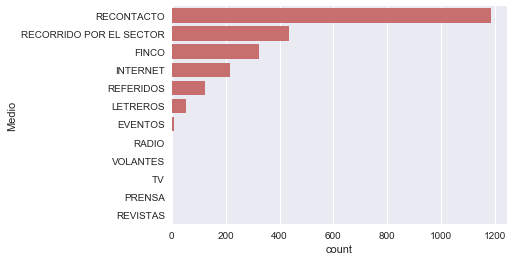

In [7]:
print('Valores nulos: ',neg_all.Medio.isnull().sum())
ver_atributo_categorico(neg_all,'Medio')

### 1.2.2 Tipo Medio

Valores nulos:  0


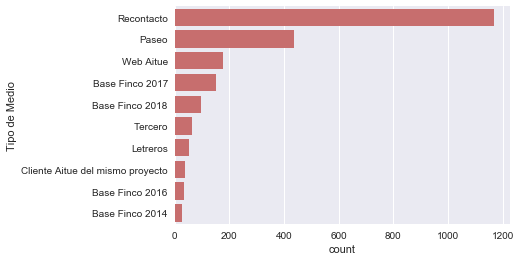

In [8]:
print('Valores nulos: ',neg_all['Tipo de Medio'].isnull().sum())
ver_atributo_categorico(neg_all,'Tipo de Medio',lim=10,limit=True)

### 1.2.3 Proyecto

Valores nulos:  0


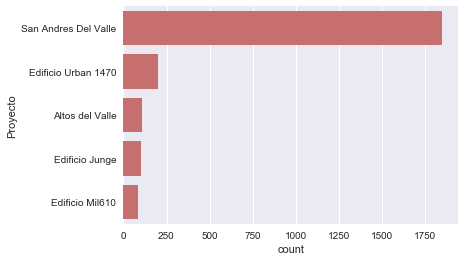

In [9]:
print('Valores nulos: ',neg_all.Proyecto.isnull().sum())
ver_atributo_categorico(neg_all,'Proyecto')

### 1.2.4 Sexo

Valores nulos:  0


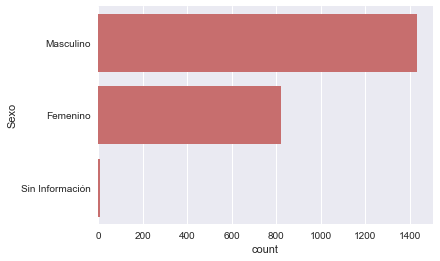

In [10]:
print('Valores nulos: ',neg_all.Proyecto.isnull().sum())
ver_atributo_categorico(neg_all,'Sexo')

### 1.2.5 Region

Valores nulos:  0


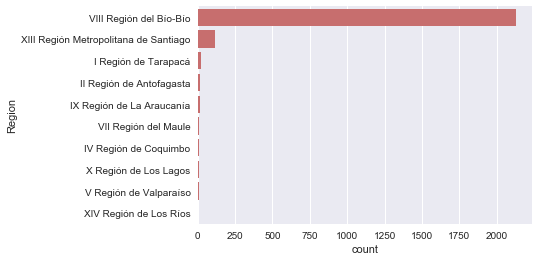

In [11]:
print('Valores nulos: ',neg_all.Region.isnull().sum())
ver_atributo_categorico(neg_all,'Region',lim=10,limit=True)

### 1.2.6 Provincia

Valores nulos:  0


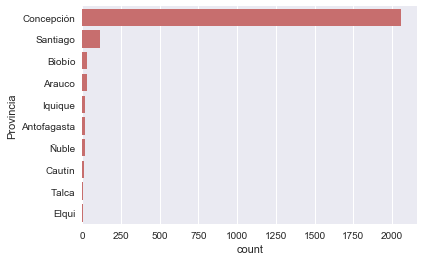

In [12]:
print('Valores nulos: ',neg_all.Provincia.isnull().sum())
ver_atributo_categorico(neg_all,'Provincia',lim=10,limit=True)

### 1.2.7 Comuna

Valores nulos:  0


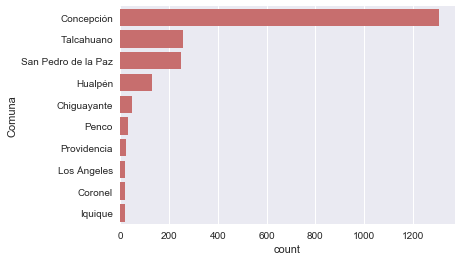

In [13]:
print('Valores nulos: ',neg_all.Comuna.isnull().sum())
ver_atributo_categorico(neg_all,'Comuna',lim=10,limit=True)

### 1.2.7 Estado Civil

Valores nulos:  78


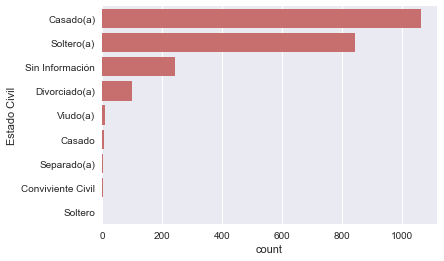

In [14]:
print('Valores nulos: ',neg_all['Estado Civil'].isnull().sum())
ver_atributo_categorico(neg_all,'Estado Civil')

### 1.2.8 Etapa Proyeto

Valores nulos:  78


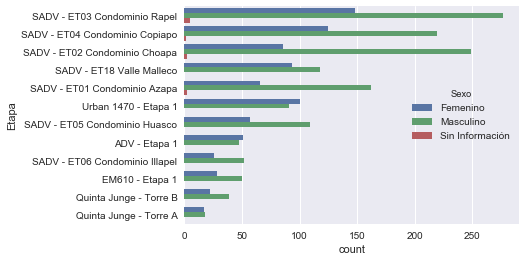

In [15]:
print('Valores nulos: ',neg_all['Estado Civil'].isnull().sum())
palette=["C0","C1","C2"]
ver_atributo_categorico(neg_all,'Etapa',hue='Sexo',palette=palette)

### 1.2.9 Actividad

Valores nulos:  122


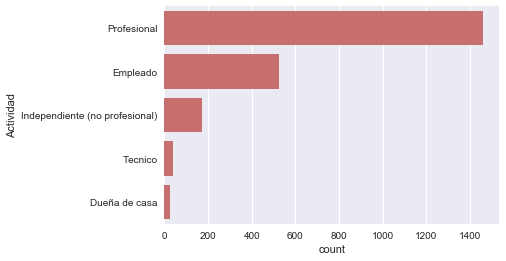

In [16]:
print('Valores nulos: ',neg_all['Actividad'].isnull().sum())
ver_atributo_categorico(neg_all,'Actividad')

### 1.2.10 Nro Grupo Familiar

Valores nulos:  488


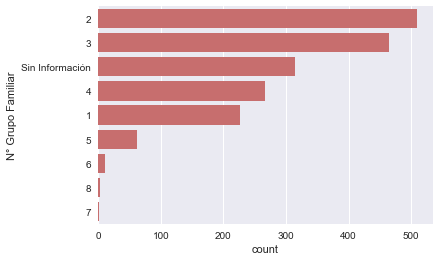

In [17]:
print('Valores nulos: ',neg_all['N° Grupo Familiar'].isnull().sum())
ver_atributo_categorico(neg_all,'N° Grupo Familiar')

### 1.2.11 Cargo

Valores nulos:  1393


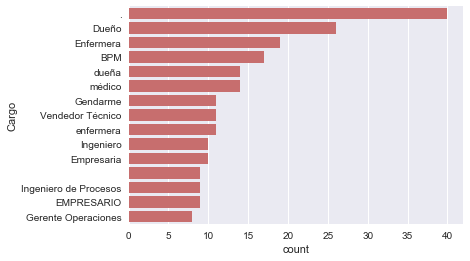

In [18]:
print('Valores nulos: ',neg_all['Cargo'].isnull().sum())
ver_atributo_categorico(neg_all,'Cargo',limit=True,lim=15)

### 1.2.12 Cargo

Valores nulos:  1129


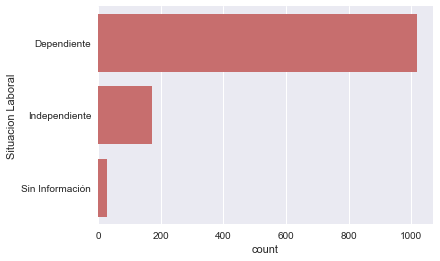

In [19]:
print('Valores nulos: ',neg_all['Situacion Laboral'].isnull().sum())
ver_atributo_categorico(neg_all,'Situacion Laboral')

### 1.2.13 Cargo

Valores nulos:  853


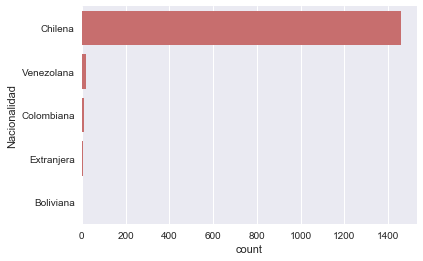

In [20]:
print('Valores nulos: ',neg_all['Nacionalidad'].isnull().sum())
ver_atributo_categorico(neg_all,'Nacionalidad')

### 1.2.13 Nacionalidad

Valores nulos:  22


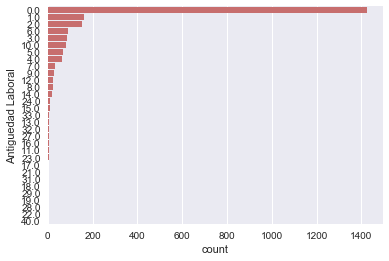

In [21]:
print('Valores nulos: ',neg_all['Antiguedad Laboral'].isnull().sum())
ver_atributo_categorico(neg_all,'Antiguedad Laboral')

### 1.2.13 Empleador

Valores nulos:  1332


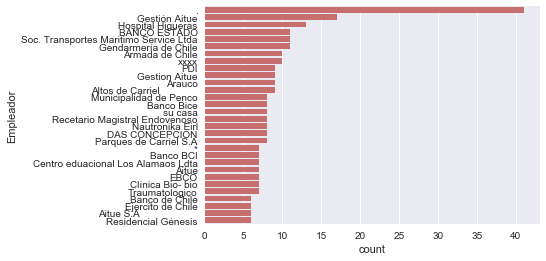

In [22]:
print('Valores nulos: ',neg_all['Empleador'].isnull().sum())
ver_atributo_categorico(neg_all,'Empleador',log=False, limit = True, lim=30)

### 1.2.14 Profesión

Valores nulos:  774
101 [nan, 'Empresario', 'Matrona', 'Odontólogo', 'Profesor', 'Ingeniería en Biotecnología', 'Otro', 'Ingeniero Eléctrico', 'Técnico en Construcción', 'Fonoaudiólogo', 'Diseño Industrial', 'Mecánico Industrial', 'Enfermería', 'Ingeniero Civil Industrial', 'Nutrición y Dietética', 'Educadora de Párvulos', 'Ingeniero Civil Electrónico', 'Ingeniero de Ejecución', 'Ingeniero Comercial', 'Psicólogo', 'Ingeniero en Construcción', 'Ingeniero', 'Periodista', 'Ingeniero Civil Eléctrico', 'Tecnólogo Médico', 'Vendedor', 'Docente', 'Ingeniero Biomédica', 'Contador Auditor', 'Asistente Social', 'Ingeniero Civil en Informática', 'Ingeniero Civil', 'Médico', 'Ingeniero Civil Química', 'Químico Farmaceutico', 'Diseñador de Ambientes', 'Independiente', 'Bioquimico', 'Abogado', 'Ingeniero Forestal', 'Ingeniero Civil Mecánico', 'Empleado Público', 'Constructor Civil', 'Agronomo', 'Ingeniero en Prevención de Riesgo', 'Administrador Público', 'Arquitecto', 'Transportista', 'Ingeniero Me

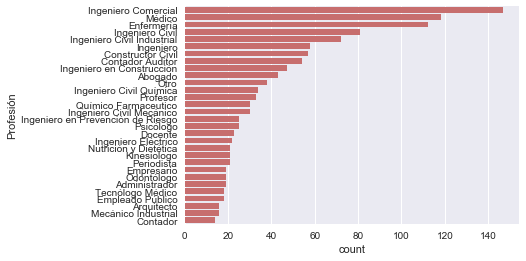

In [23]:
print('Valores nulos: ',neg_all['Profesión'].isnull().sum())
ver_atributo_categorico(neg_all,'Profesión',log=True, limit = True, lim=30)

Valores nulos:  1
3 ['Natural', 'Jurídico', nan]


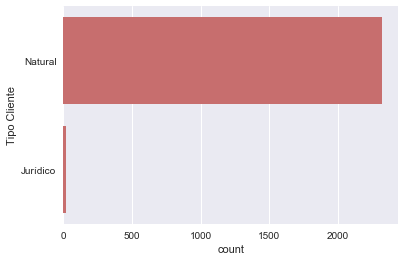

In [24]:
print('Valores nulos: ',neg_all['Tipo Cliente'].isnull().sum())
ver_atributo_categorico(neg_all,'Tipo Cliente',log=True, limit = True, lim=20)

Valores nulos:  0


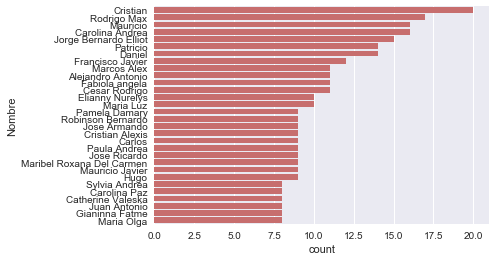

In [25]:
# f = plt.figure()
print('Valores nulos: ',neg_all['Nombre'].isnull().sum())
ver_atributo_categorico(neg_all,'Nombre', limit = True, lim=30)
# f.savefig('..\\img\\neg\\nombre_check.png',bbox_inches='tight')

Valores nulos:  16


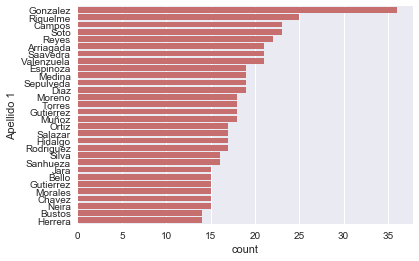

In [26]:
# f = plt.figure()
print('Valores nulos: ',neg_all['Apellido 1'].isnull().sum())
ver_atributo_categorico(neg_all,'Apellido 1', limit = True, lim=30)
# f.savefig('img/neg/apellido1_check.png',bbox_inches='tight')

Valores nulos:  25


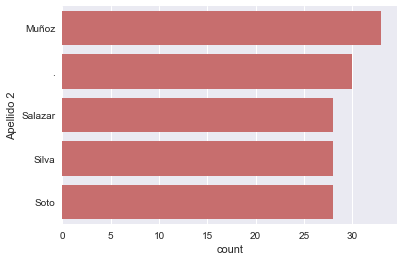

In [27]:
# f = plt.figure()
print('Valores nulos: ',neg_all['Apellido 2'].isnull().sum())
ver_atributo_categorico(neg_all,'Apellido 2',log=False, limit = True, lim=5)
# f.savefig('img/apellido2_check.png',bbox_inches='tight')

Valores nulos:  1961


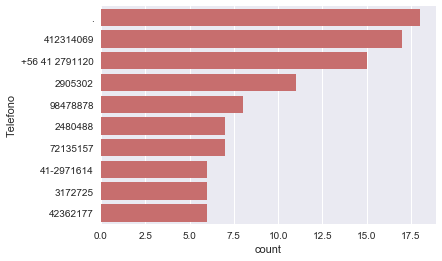

In [28]:
# f = plt.figure()
print('Valores nulos: ',neg_all['Telefono'].isnull().sum())
ver_atributo_categorico(neg_all,'Telefono', limit = True, lim=10)
# f.savefig('img/telefono_check.png',bbox_inches='tight')

Valores nulos:  1


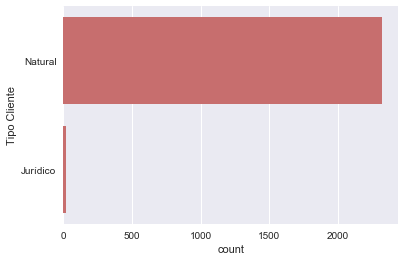

In [29]:
# f = plt.figure()
print('Valores nulos: ',neg_all['Tipo Cliente'].isnull().sum())
ver_atributo_categorico(neg_all,'Tipo Cliente',log=False, limit = True, lim=5)
# f.savefig('img/celular_check.png',bbox_inches='tight')

Valores nulos:  0


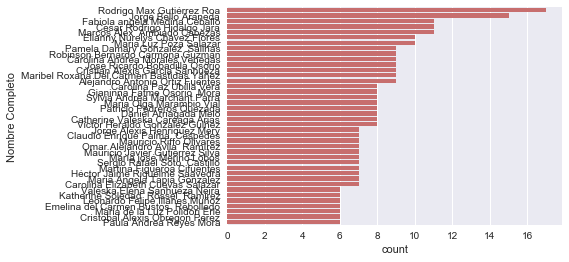

In [30]:
# f = plt.figure()
print('Valores nulos: ',neg_all['Nombre Completo'].isnull().sum())
ver_atributo_categorico(neg_all,'Nombre Completo', limit = True, lim=40)
# f.savefig('img/nombrecompleto_check.png',bbox_inches='tight')

Valores nulos:  78


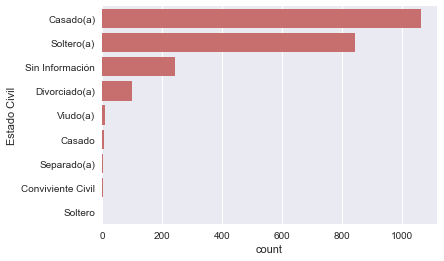

In [31]:
print('Valores nulos: ',neg_all['Estado Civil'].isnull().sum())
ver_atributo_categorico(neg_all,'Estado Civil')

Valores nulos:  0
3 ['Normal', 'Desistimiento', 'Resciliacion']


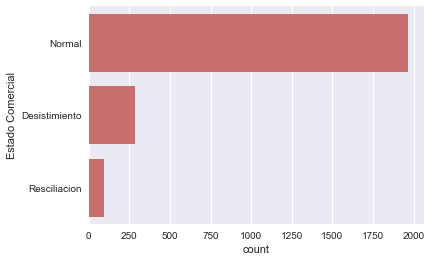

In [32]:
print('Valores nulos: ',neg_all['Estado Comercial'].isnull().sum())
ver_atributo_categorico(neg_all,'Estado Comercial',log=True)

Valores nulos:  0
5 ['Anulada', 'Promesado', 'Reservado', 'Escriturado', 'Entregado']


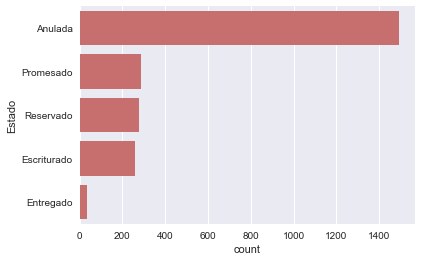

In [33]:
print('Valores nulos: ',neg_all['Estado'].isnull().sum())
ver_atributo_categorico(neg_all,'Estado',log=True)

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


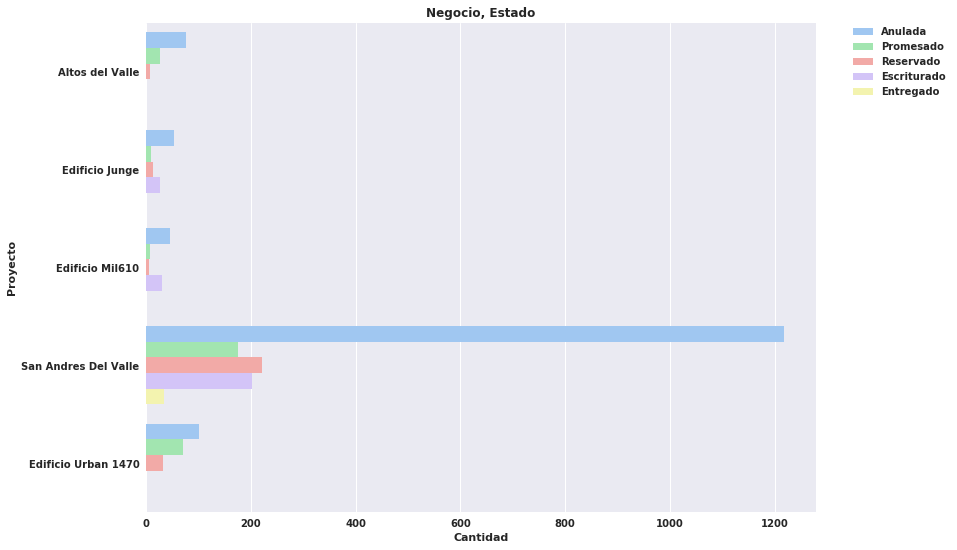

In [36]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

sb.set_palette("YlGn")
sb.set_color_codes("deep")
f = plt.figure(figsize=(12,9))
sb.countplot(y="Proyecto",data=neg_all, hue="Estado",
            palette="pastel");
plt.xlabel('Cantidad', weight='bold')
plt.ylabel('Proyecto', weight='bold')
plt.title("Negocio, Estado", weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'weight':'bold'})

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['normal'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


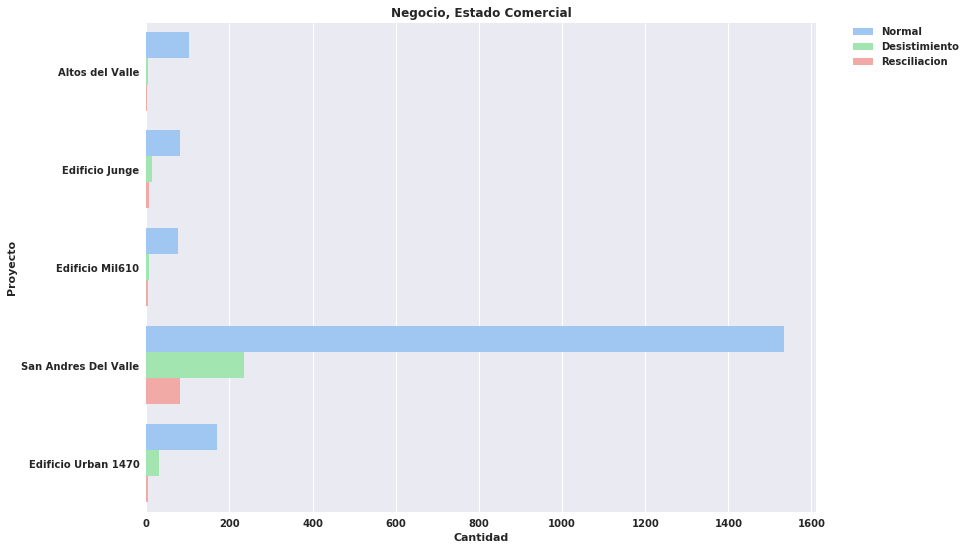

In [39]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)

sb.set_palette("YlGn")
sb.set_color_codes("deep")
f = plt.figure(figsize=(12,9))
sb.countplot(y="Proyecto",data=neg_all, hue="Estado Comercial",
            palette="pastel");
plt.xlabel('Cantidad', weight='bold')
plt.ylabel('Proyecto', weight='bold')
plt.title("Negocio, Estado Comercial", weight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., prop={'weight':'bold'})